In [1]:
pip install nltk

In [2]:
pip install seaborn

In [3]:
import re #for regular expressions import nitk #for text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [4]:
pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/drive')
from pandas import DataFrame

Mounted at /content/drive


In [7]:
train = pd.read_csv('/content/drive/MyDrive/dataset/traindata.csv')
test = pd.read_csv('/content/drive/MyDrive/dataset/testdata.csv')

In [8]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [9]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [10]:
train.shape

(31962, 3)

In [11]:
test.shape

(17197, 2)

In [12]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

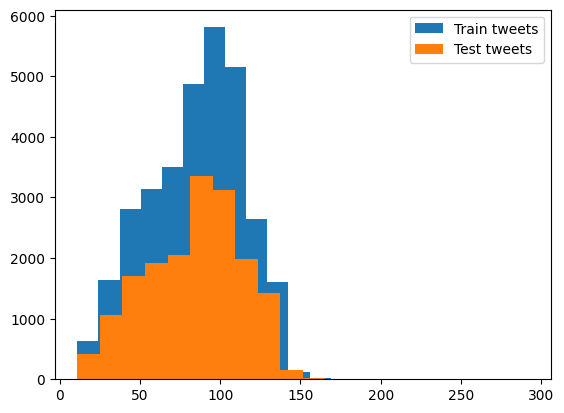

In [13]:
length_train_dataset=train['tweet'].str.len()
length_test_dataset = test['tweet'].str.len()
plt.hist(length_train_dataset, bins=20, label="Train tweets")
plt.hist(length_test_dataset, bins=20, label="Test tweets")
plt.legend()
plt.show

In [14]:
#combine=train.append(test, ignore_index=True) #train and test dataset are combined
#combine.shape

In [15]:
def remove_pattern(input_text, pattern):

  r=re.findall(pattern, input_text)
  for i in r:
    input_text = re.sub(i,'', input_text)
  return input_text

**Removing twitter handles**

In [16]:
train['tidy_tweet'] = np.vectorize(remove_pattern)(train['tweet'],"@[\w]*")
train.head()

,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [17]:
train['tidy_tweet'] = train['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")
train.head(10)

<ipython-input-17-27e41c6a4910>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train['tidy_tweet'] = train['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")


,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


**Removing short words (a,is,so etc..)**

In [18]:
train['tidy_tweet']= train['tidy_tweet'].apply(lambda x: ''.join([w  for w in x.split()if len(w)>3])) #removing words whose length is less than 3

In [19]:
train.head()

,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,whenfatherdysfunctionalselfishdragskidsintodysfunction#run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks#lyftcreditcausetheyofferwheelchairvans#disapointed#getthanked
2,3,0,bihday your majesty,bihdayyourmajesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#modellovetakewithtime
4,5,0,factsguide: society now #motivation,factsguidesociety#motivation


In [20]:
tokenized_tweet = train['tidy_tweet'].apply(lambda x:x.split()) #it will split all words by whitespace
tokenized_tweet.head()

0              [whenfatherdysfunctionalselfishdragskidsintodysfunction#run]
1    [thanks#lyftcreditcausetheyofferwheelchairvans#disapointed#getthanked]
2                                                       [bihdayyourmajesty]
3                                                  [#modellovetakewithtime]
4                                            [factsguidesociety#motivation]
Name: tidy_tweet, dtype: object

In [21]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [22]:
#now let's combine these tokens back

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i]) #concat all words into one sentence
train['tidy_tweet'] = tokenized_tweet

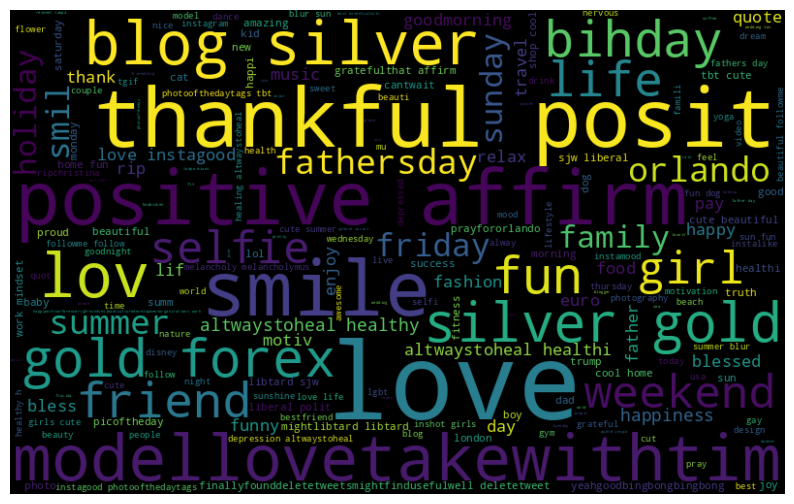

In [23]:
all_words = ' '.join([text for text in train['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [24]:
#you can see that most words are positive or neutral in above wordcloud.
#now we will plot separate wordclouds for both racist and non-racis/sexist in our data.

**Separate cloud**

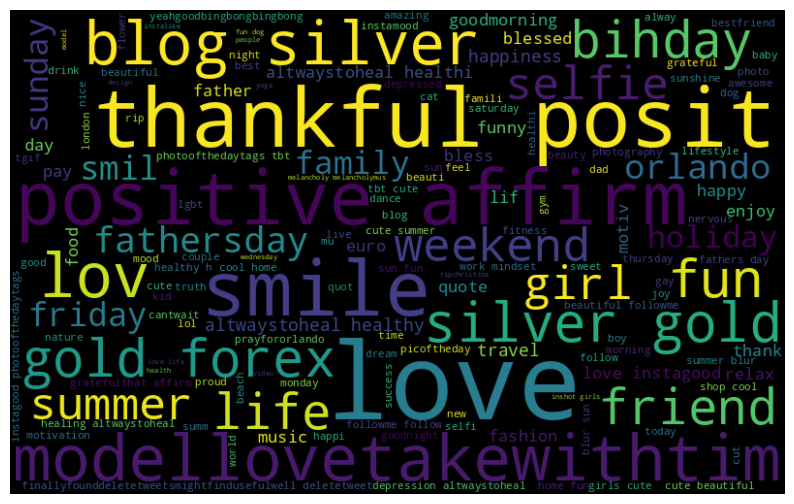

In [25]:
normal_words= ' '.join([text for text in train['tidy_tweet'][train['label']==0]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

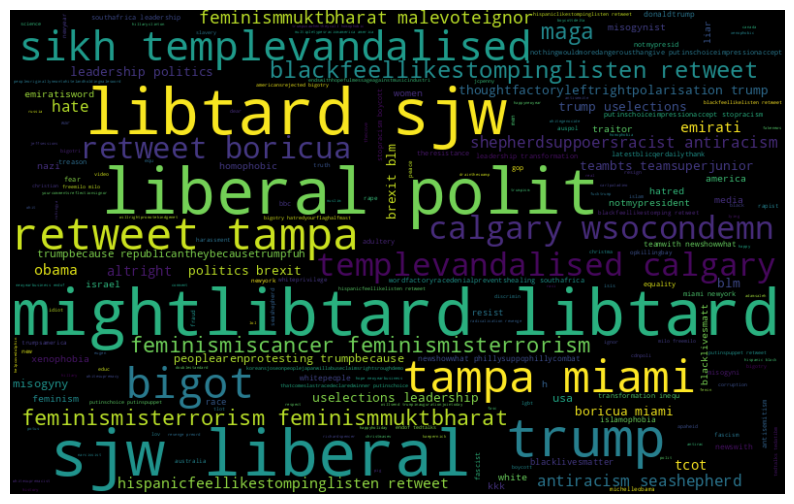

In [26]:
#racist tweet

negative_words= ' '.join([text for text in train['tidy_tweet'][train['label']==1]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

**understanding impact of hashtags on tweet sentiment**

In [27]:
#collect hashtags

def hashtag_extract(x):
    hashtags=[]
    for i in x: #loop over words contain in tweet
        ht = re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags

In [28]:
#extracting hashtags from non racist tweets
ht_regular = hashtag_extract(train['tidy_tweet'][train['label']==0])
#extracting hashtags from racist tweets
ht_negative=hashtag_extract(train['tidy_tweet'][train['label']==1])
ht_regular = sum(ht_regular,[])
ht_negative = sum(ht_negative,[])

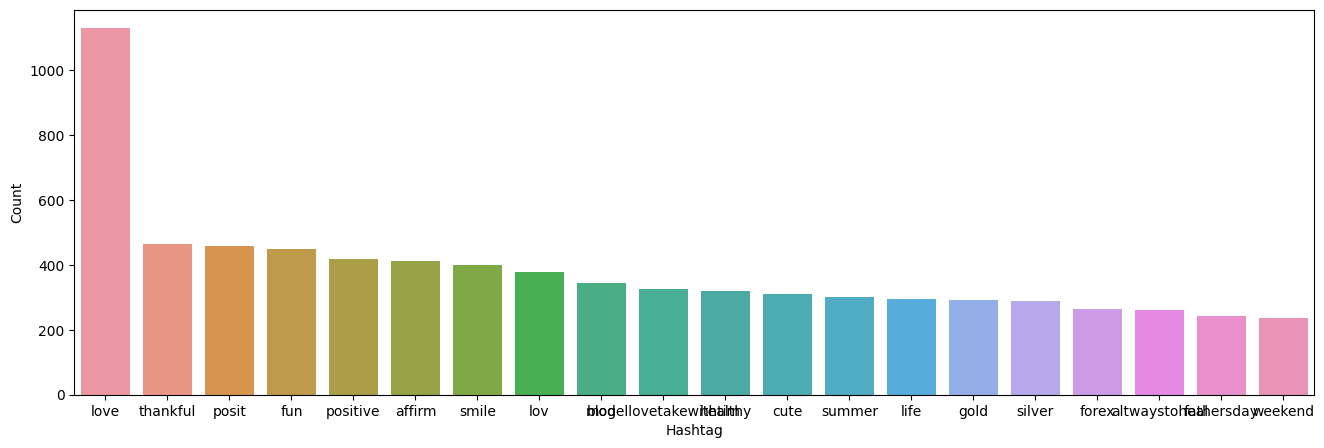

In [29]:
#non-racist tweets

nonracist_tweets = nltk.FreqDist(ht_regular)
df1 = pd.DataFrame({'Hashtag': list(nonracist_tweets.keys()),'Count':list(nonracist_tweets.values())})

#selecting top 20 most frequent hashtags
df1 = df1.nlargest(columns="Count",n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df1, x="Hashtag", y="Count")
ax.set(ylabel = "Count")
plt.show()

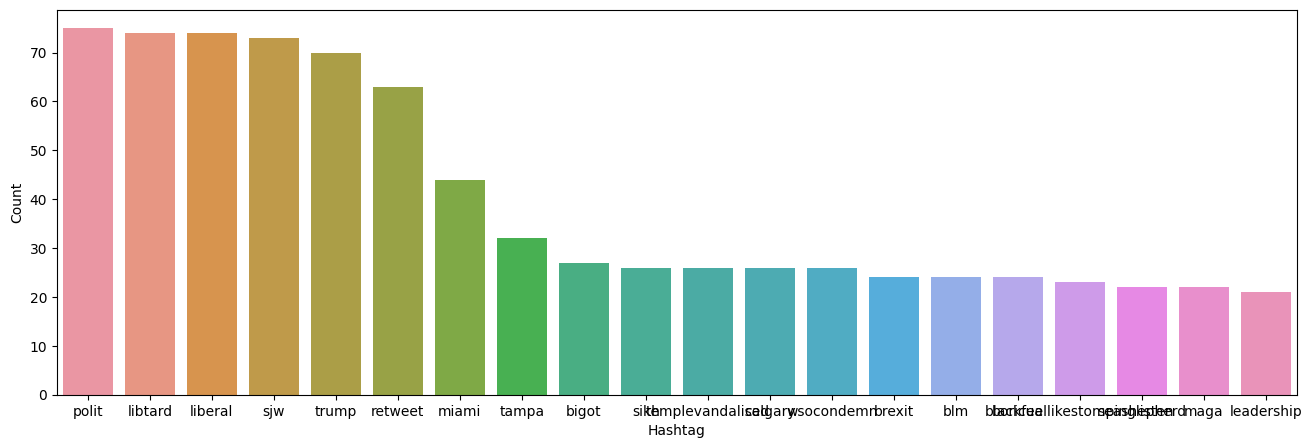

In [30]:
#racist tweets

racist_tweets = nltk.FreqDist(ht_negative)
df2 = pd.DataFrame({'Hashtag': list(racist_tweets.keys()),'Count': list(racist_tweets.values())}) #count number of occurrence of particular word

#selecting top 20 frequent  hashtags

df2 = df2.nlargest(columns = "Count",n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df2, x="Hashtag",y="Count")
plt.show()

**Now we will apply assorted techniques like bag of words,TF-IDF for converting data into features**

In [31]:
pip install gensim

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [33]:
#Bag-of-words

#Each row in matrix M contains the frequency of tokens(words) in the document D(i)

bow_vectorizer = CountVectorizer(max_df=0.90 ,min_df=2 , max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(train['tidy_tweet']) # tokenize and build vocabulary
bow.shape

(31962, 1000)

In [34]:
#TF-IDF

#TF = (number of times term appear in a document)/(Number of terms in dcoument)
#IDF = log(N/n)-N is nummber of documents and n is number of documents a term has appeared in.

#TF-IDF = TF * IDF

#tfidf_vectorizer= TfidfVectorizer(max_df=0.90, min_df=2,max_features =1000,stop_words='english')
#tfidf = tfidf_vectorizer.fit_transform(combine['tidy_tweet'])
#tfidf.shape

In [35]:
combine=train.fillna(0) #replace all null values by 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, train['label'],
                                                    test_size=0.2, random_state=69)


In [36]:

print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (25569, 1000)
X_test_shape :  (6393, 1000)
y_train_shape :  (25569,)
y_test_shape :  (6393,)


Binomial Naive Bayes Classifier

In [37]:
# Train the Binomial Naive Bayes classifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve, auc


ber_model_naive = BernoulliNB().fit(X_train, y_train)
ber_predicted_naive = ber_model_naive.predict(X_test)

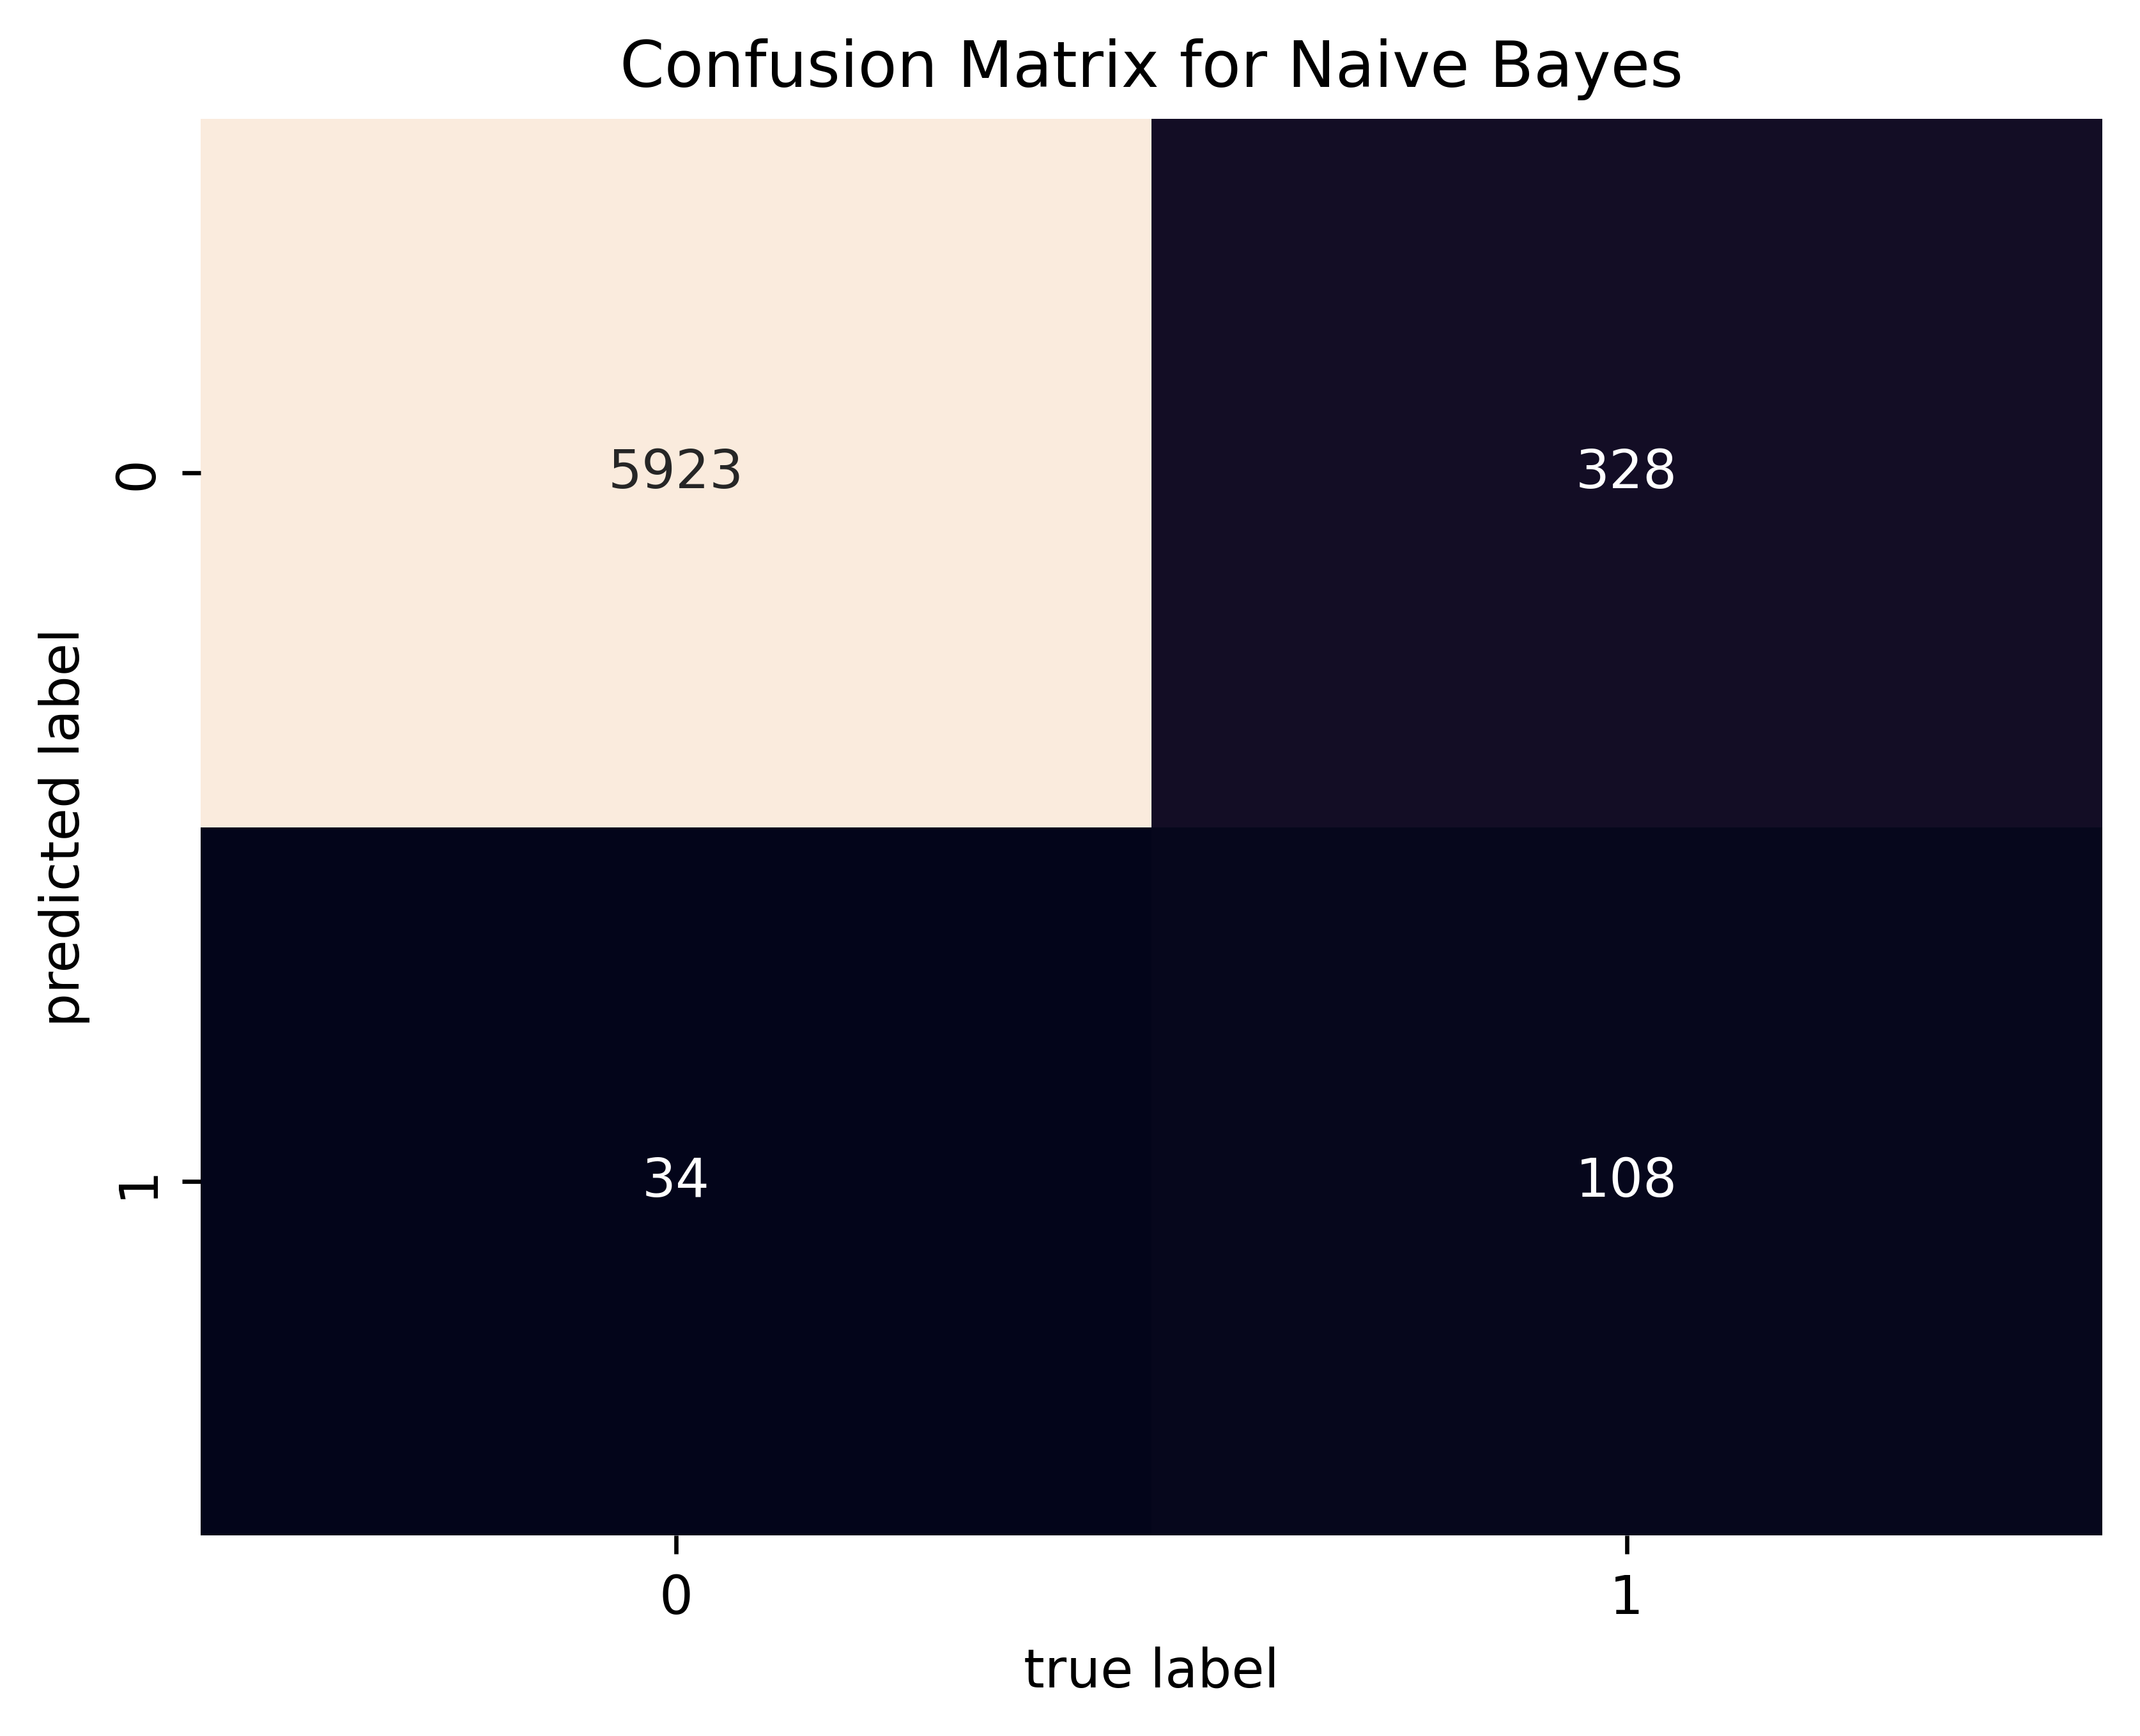

In [38]:
plt.figure(dpi=600)
cat = confusion_matrix(y_test, ber_predicted_naive)
sns.heatmap(cat.T, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [39]:
berscore_naive = accuracy_score(ber_predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",berscore_naive)

Accuracy with Naive-bayes:  0.9433755670264352


In [40]:
# Predict probabilities for positive class on both training and test sets
yb_train_scores = ber_model_naive.predict_proba(X_train)[:, 1]
yb_test_scores = ber_model_naive.predict_proba(X_test)[:, 1]


In [41]:
# Compute ROC curve and AUC for training set
fpr_trainb, tpr_trainb, thresholds_train = roc_curve(y_train, yb_train_scores)
roc_auc_trainb = auc(fpr_trainb, tpr_trainb)



In [42]:
# Compute ROC curve and AUC for testing set
fpr_testb, tpr_testb, thresholds_test = roc_curve(y_test, yb_test_scores)
roc_auc_testb = auc(fpr_testb, tpr_testb)


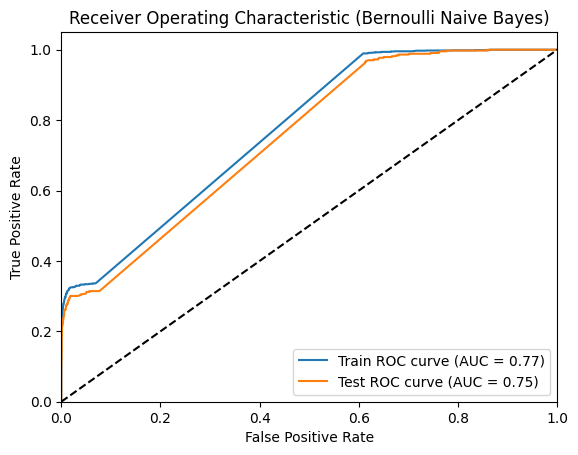

In [43]:
# Plot ROC curves
plt.plot(fpr_trainb, tpr_trainb, label='Train ROC curve (AUC = %0.2f)' % roc_auc_trainb)
plt.plot(fpr_testb, tpr_testb, label='Test ROC curve (AUC = %0.2f)' % roc_auc_testb)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Bernoulli Naive Bayes)')
plt.legend(loc="lower right")
plt.show()


**We will use Multinomial Naive Bayes Classifier**

In [44]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier
from sklearn.metrics import roc_curve, auc

# Train the Multinomial Naive Bayes classifier
model_naive = MultinomialNB().fit(X_train, y_train)
predicted_naive = model_naive.predict(X_test)

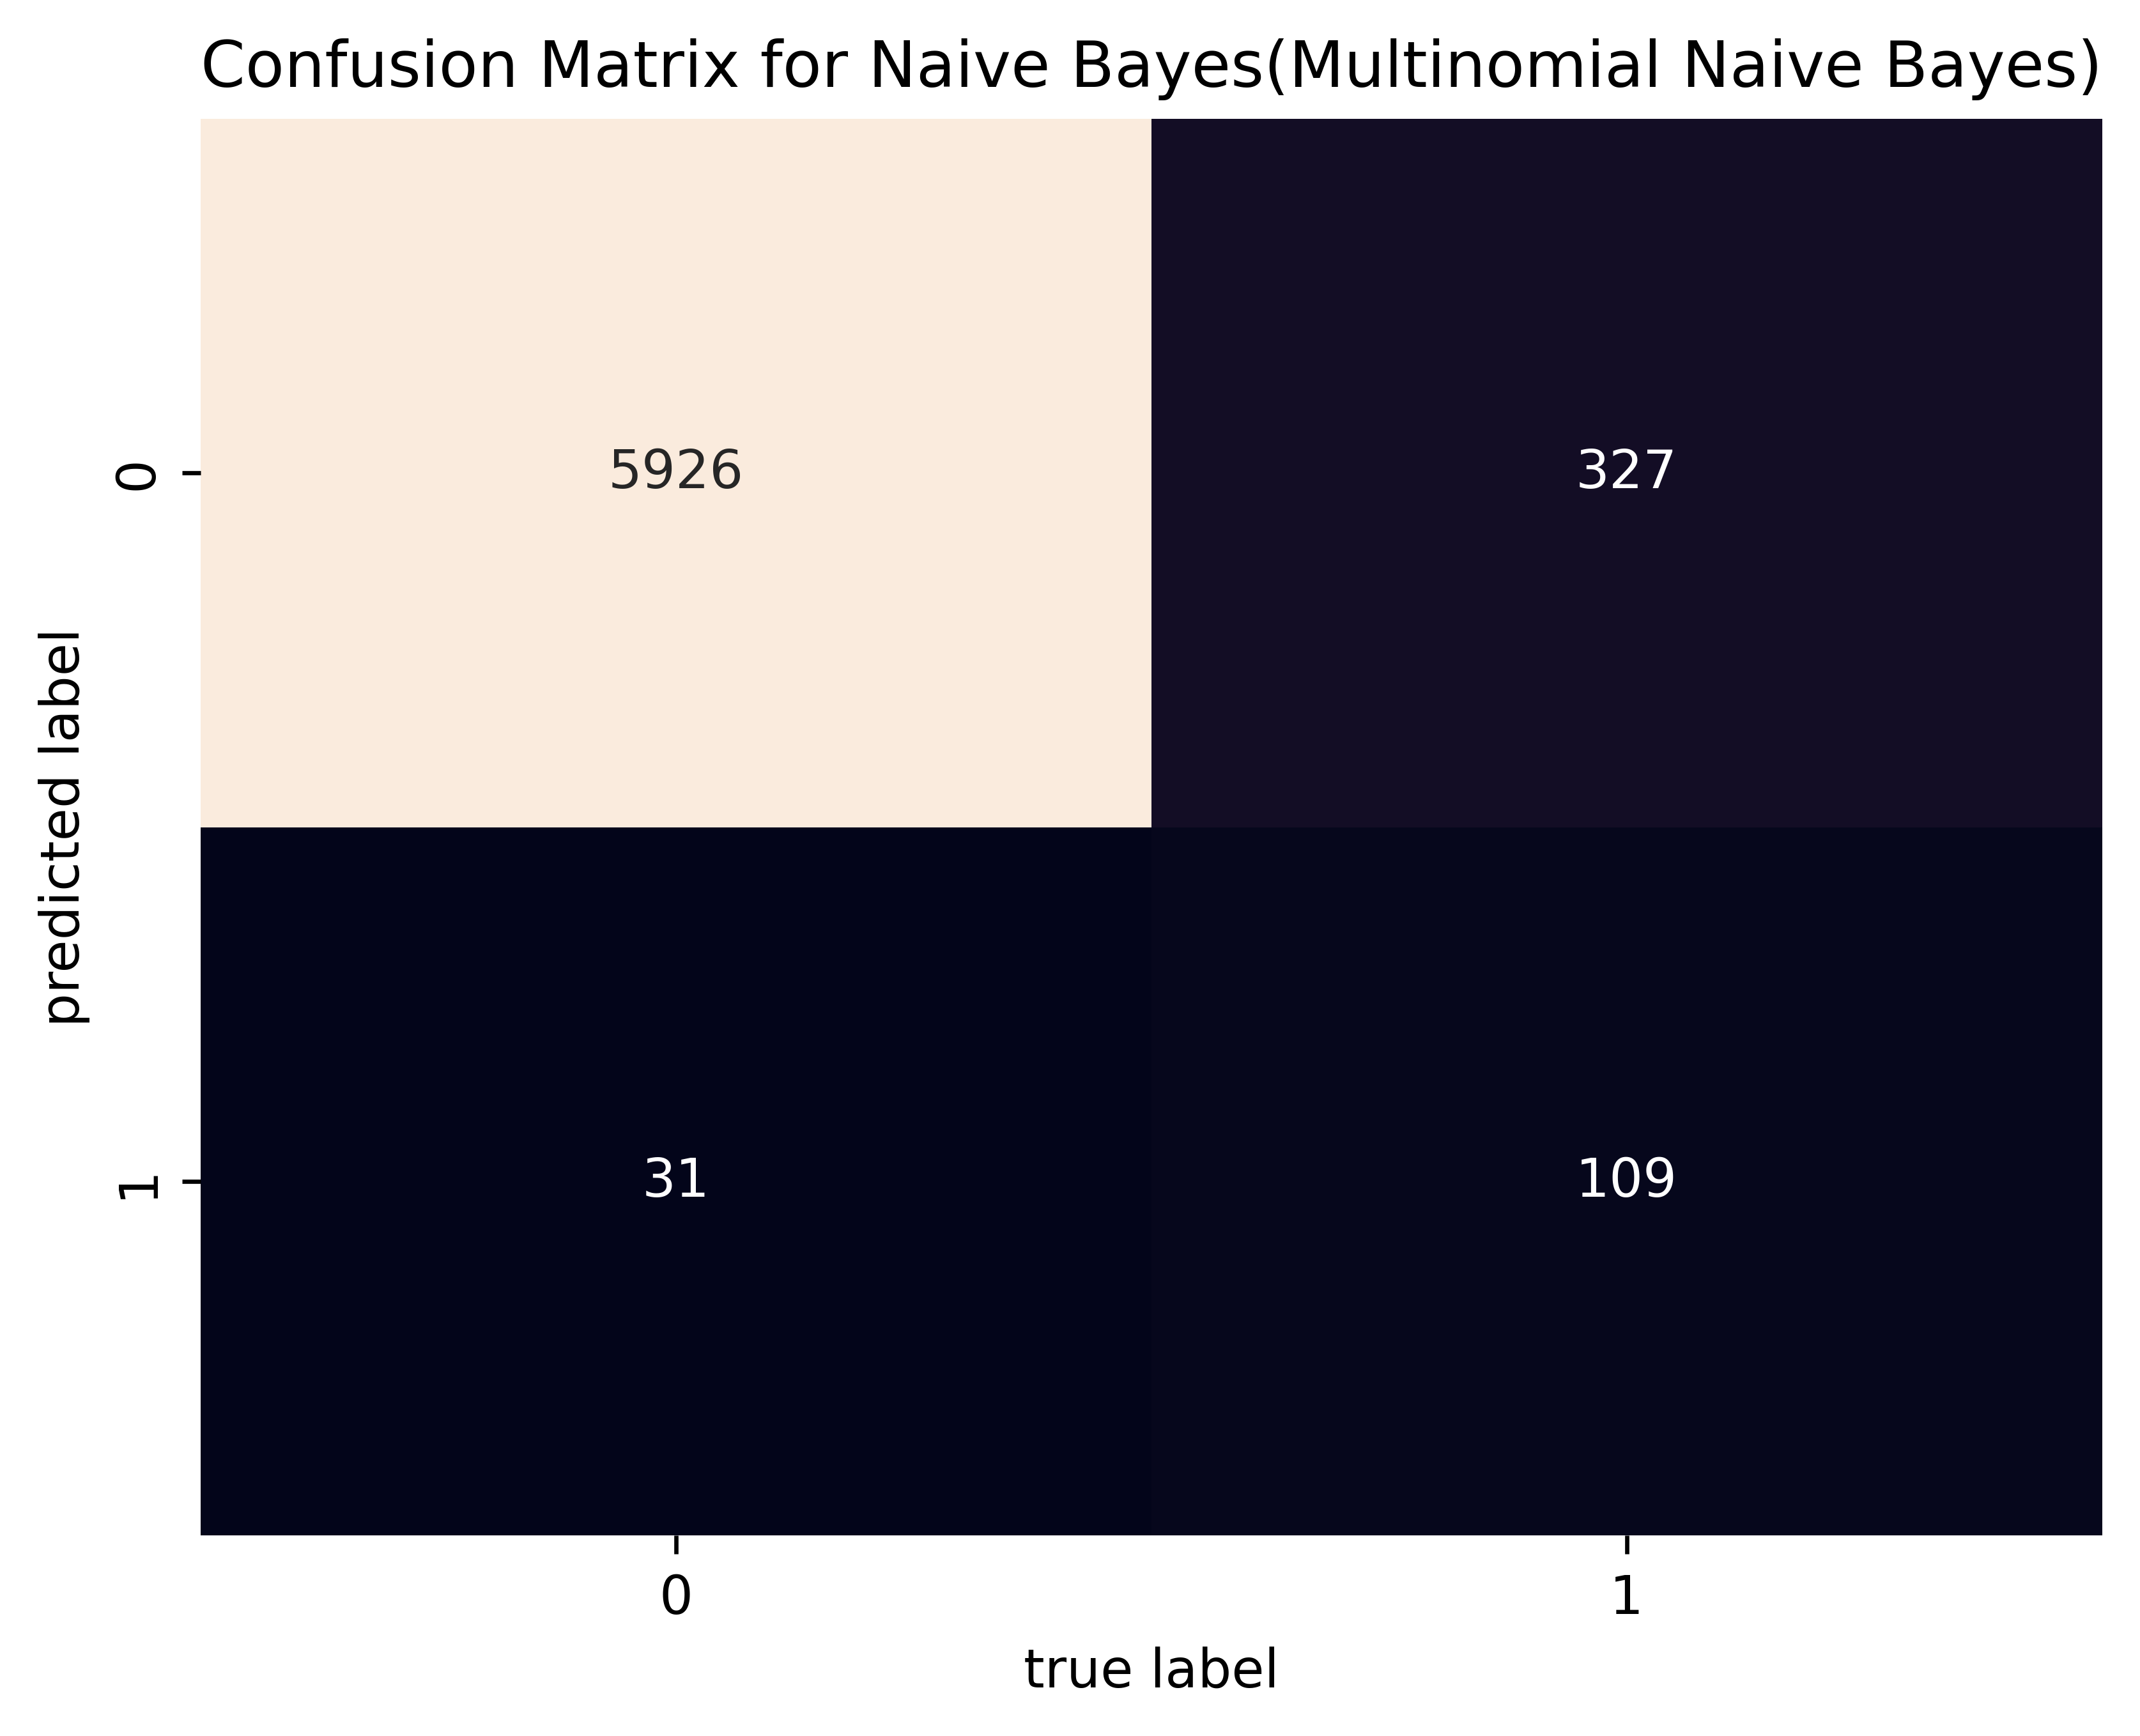

In [45]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes(Multinomial Naive Bayes)')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.9440012513686845


In [47]:
# Predict probabilities for positive class on both training and test sets
ytrain_score= model_naive.predict_proba(X_train)[:, 1]
y_scores = model_naive.predict_proba(X_test)[:, 1]
y_scores,ytrain_score

(array([7.06324064e-02, 4.51465519e-04, 3.18638124e-02, ...,
        3.89749311e-07, 3.64236326e-03, 7.06324064e-02]),
 array([7.06324064e-02, 3.45504298e-02, 7.06324064e-02, ...,
        3.11312480e-06, 7.06324064e-02, 7.52162015e-02]))

In [48]:
# Compute ROC curve and AUC for training set
fpr_train, tpr_train, thresholds = roc_curve(y_train, ytrain_score)
roc_auc_train = auc(fpr_train, tpr_train)

In [49]:
# Compute ROC curve and AUC for test set
fpr_test, tpr_test, thresholds = roc_curve(y_test, y_scores)
roc_auc_test = auc(fpr_test, tpr_test)

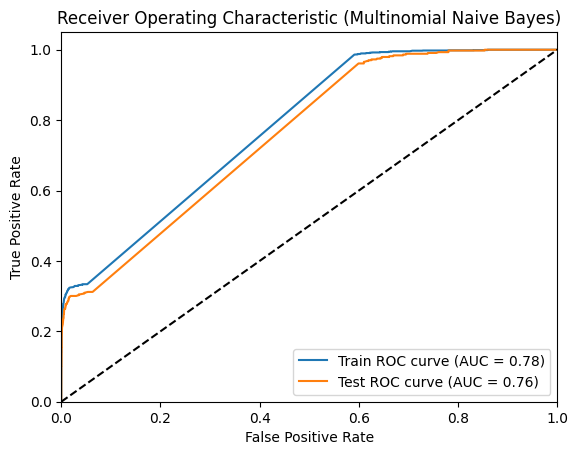

In [50]:
# Plot ROC curve
plt.plot(fpr_train, tpr_train, label='Train ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, label='Test ROC curve (AUC = %0.2f)' % roc_auc_test)

plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Multinomial Naive Bayes)')
plt.legend(loc="lower right")
plt.show()


Gaussian Naive Bayes classifier

In [51]:
from sklearn.naive_bayes import GaussianNB
# Convert sparse matrix to dense array
X_train_dense = X_train.toarray()
 #Train the Gaussian Naive Bayes classifier
model_gaussian = GaussianNB().fit(X_train_dense, y_train)
# Convert test set to dense array
X_test_dense = X_test.toarray()
gaus_predicted_naive = model_gaussian.predict(X_test_dense)

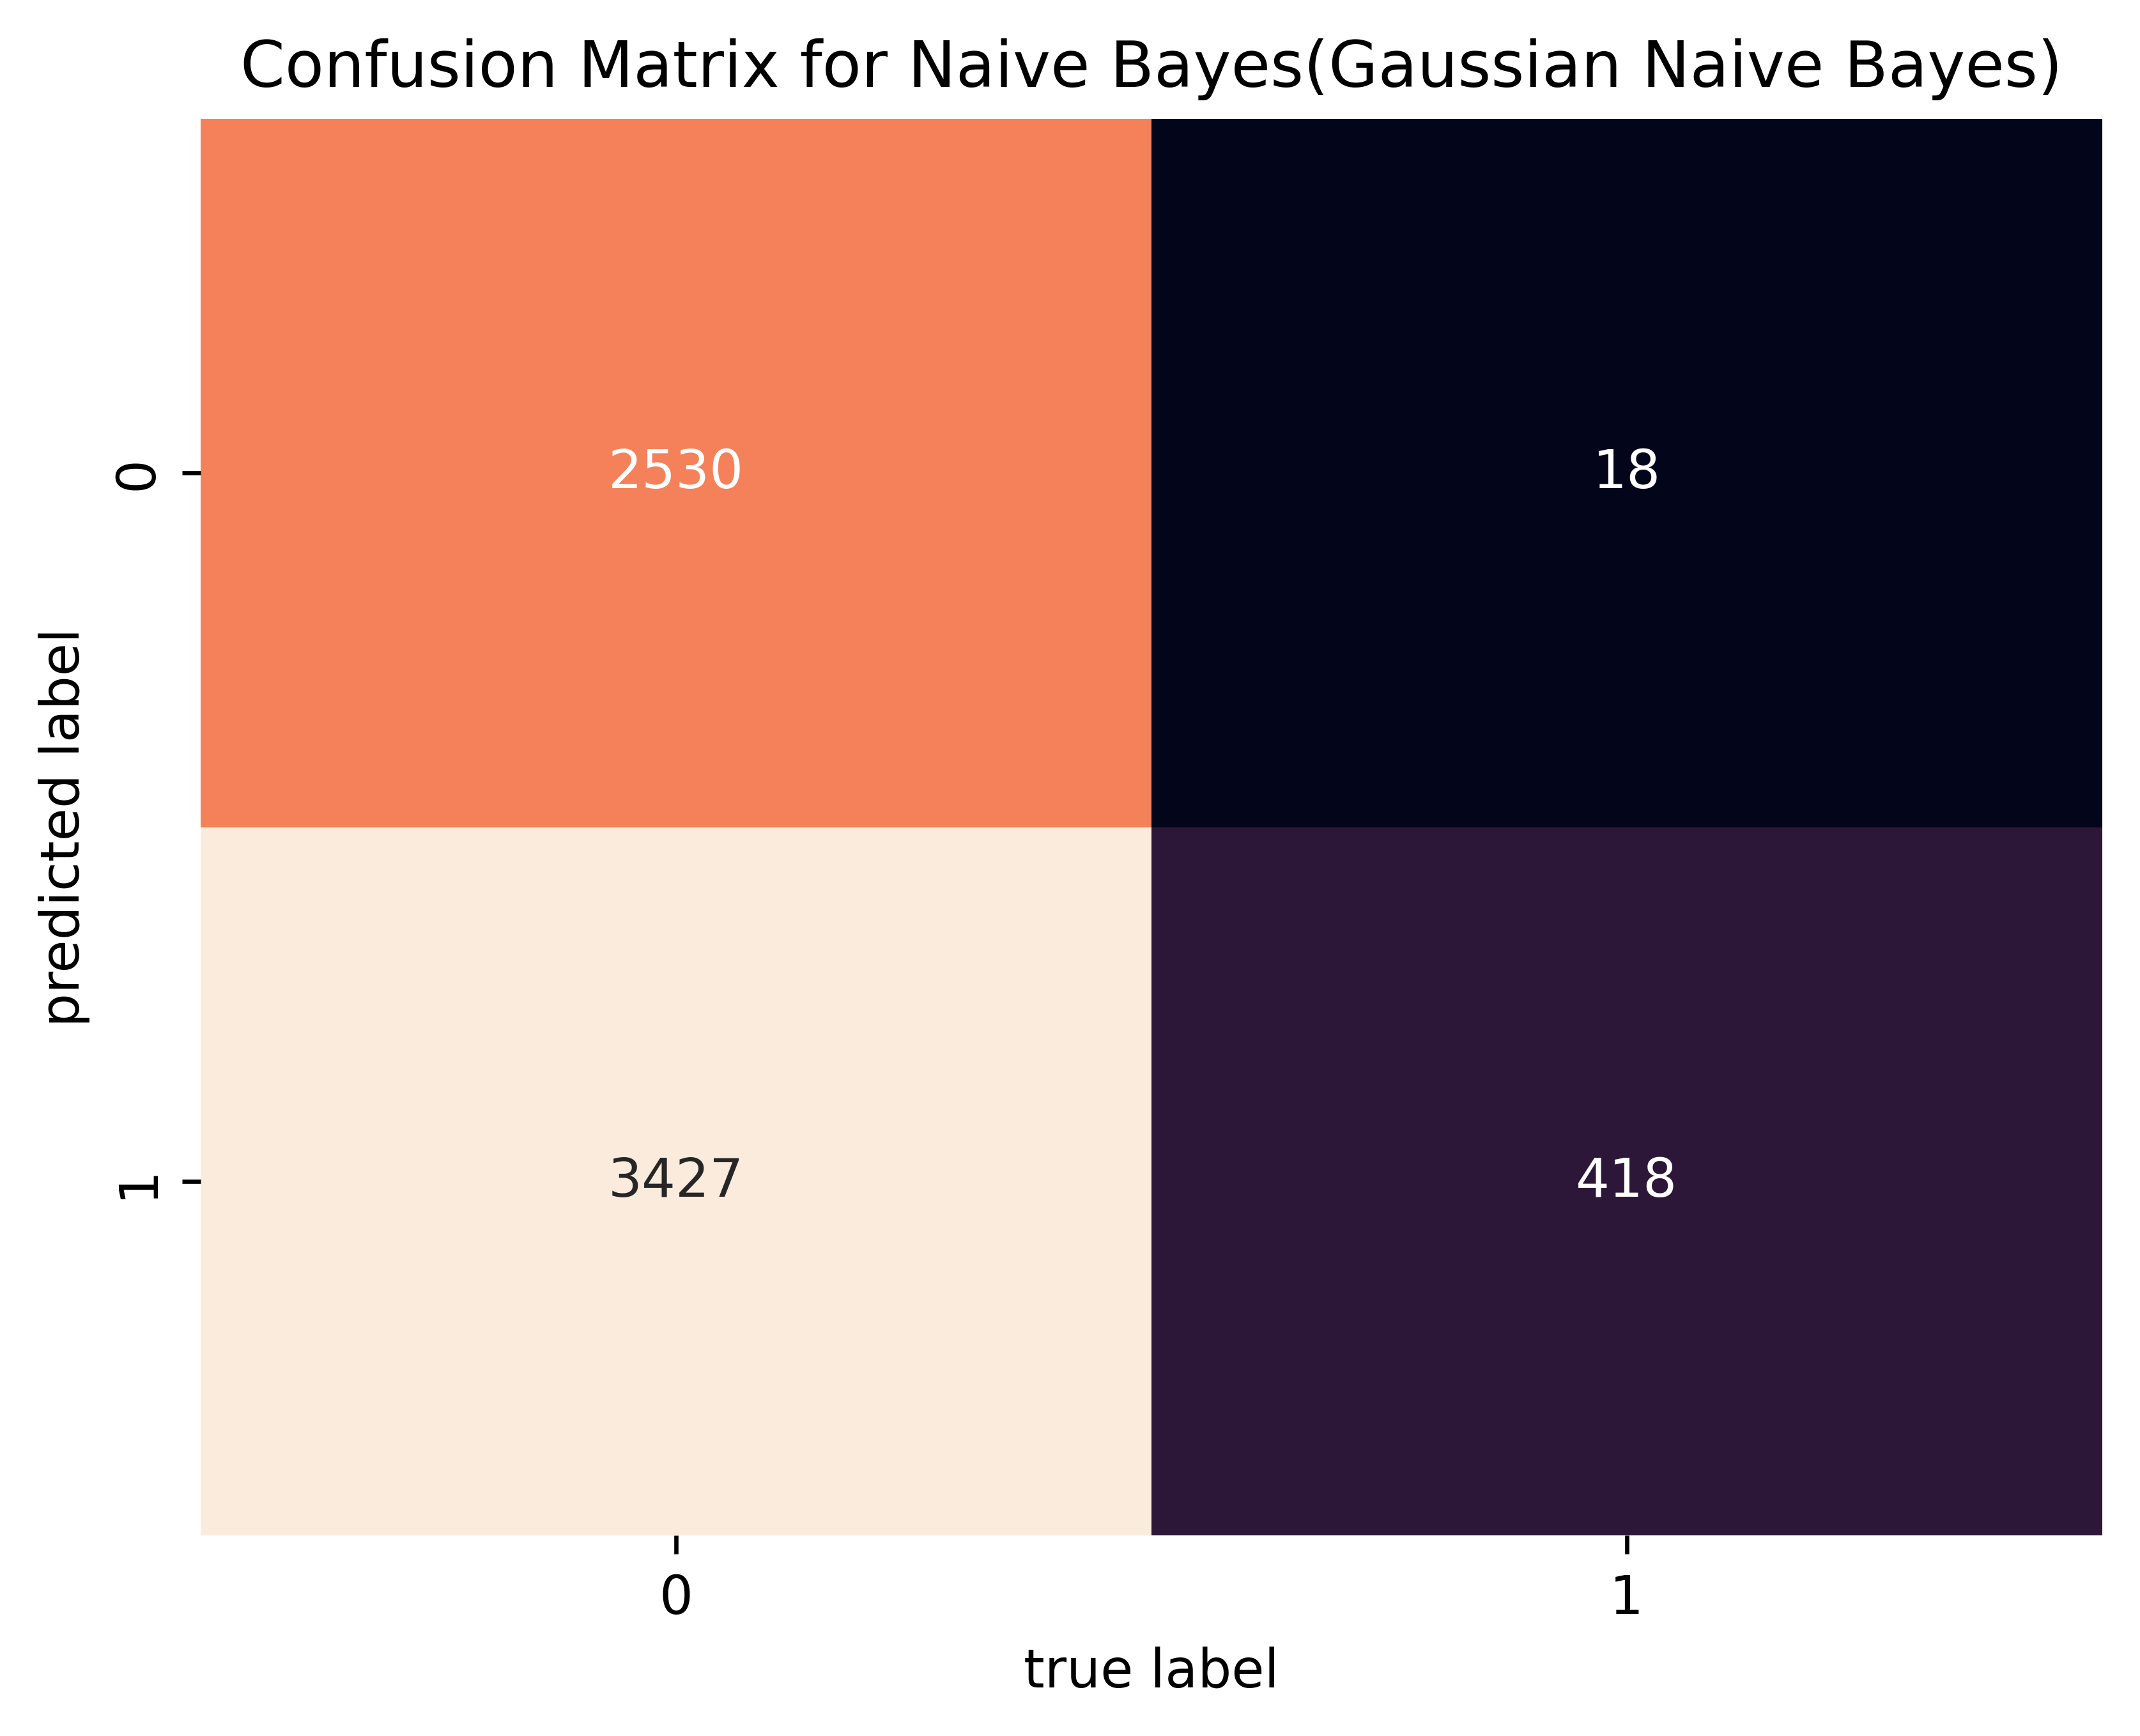

In [52]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
pat = confusion_matrix(y_test, gaus_predicted_naive)
sns.heatmap(pat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes(Gaussian Naive Bayes)')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [53]:
gscore_naive = accuracy_score(gaus_predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",gscore_naive)

Accuracy with Naive-bayes:  0.4611293602377601


In [54]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
CNB = ComplementNB()
CNB.fit(X_train, y_train)

from sklearn import metrics
predicted = CNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))


ComplementNB model accuracy is 89.43%
------------------------------------------------
Confusion Matrix:
      0    1
0  5581  376
1   300  136
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      5957
           1       0.27      0.31      0.29       436

    accuracy                           0.89      6393
   macro avg       0.61      0.62      0.61      6393
weighted avg       0.90      0.89      0.90      6393



In [55]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))


MultinominalNB model accuracy is 94.40%
------------------------------------------------
Confusion Matrix:
      0    1
0  5926   31
1   327  109
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5957
           1       0.78      0.25      0.38       436

    accuracy                           0.94      6393
   macro avg       0.86      0.62      0.67      6393
weighted avg       0.94      0.94      0.93      6393



In [56]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X_train, y_train)

predicted = BNB.predict(X_test)
accuracy_score_bnb = metrics.accuracy_score(predicted,y_test)

print('BernoulliNB model accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))


BernoulliNB model accuracy = 94.34%
------------------------------------------------
Confusion Matrix:
      0    1
0  5923   34
1   328  108
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5957
           1       0.76      0.25      0.37       436

    accuracy                           0.94      6393
   macro avg       0.85      0.62      0.67      6393
weighted avg       0.93      0.94      0.93      6393

